In [6]:
import pickle
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import networkx as nx
import os
from dotenv import load_dotenv
load_dotenv()
number_of_blocks = int(os.environ["NUMBER_OF_BLOCKS"])
df = pd.read_pickle(os.environ['SAVE_DF_PATH']+str(number_of_blocks))

sender = df['Sender Address'].tolist()
receiver = df['Receiver Address'].tolist()
total = sender + receiver

# new_df = df.groupby(['Receiver Address'])['Sender Address'].count().reset_index(
#   name='Count').sort_values(['Count'], ascending=False)




<Figure size 2000x1000 with 0 Axes>

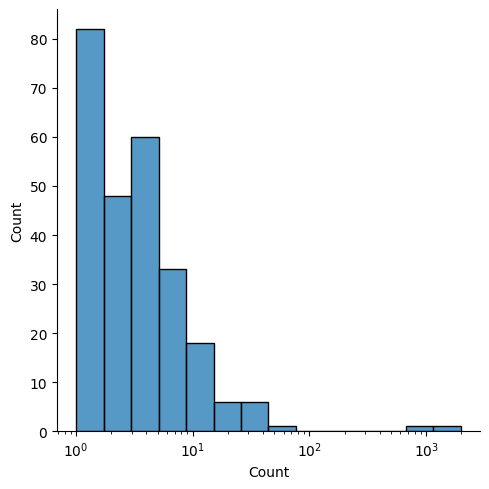

<AxesSubplot: xlabel='Sender Address', ylabel='Count'>

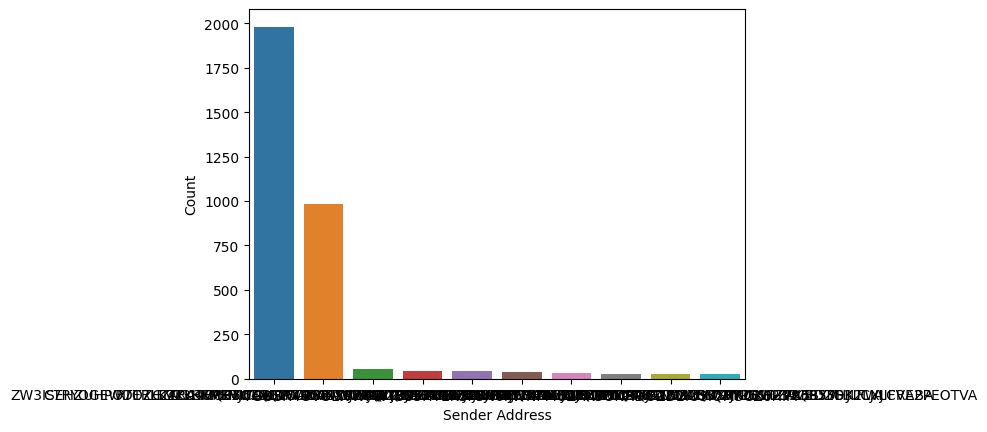

In [3]:
#Grafico de frecuencia para senders

senders = df[['Sender Address', 'Transaction Type']]
senders

new_df = senders.groupby(['Sender Address'])['Sender Address'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
#new_df

plt.figure(figsize=(20,10))
sb.displot(new_df, x = 'Count', log_scale=True)
plt.show()

f_new_df = new_df[:10]
f_new_df

sb.barplot(data = f_new_df, x='Sender Address', y = 'Count')





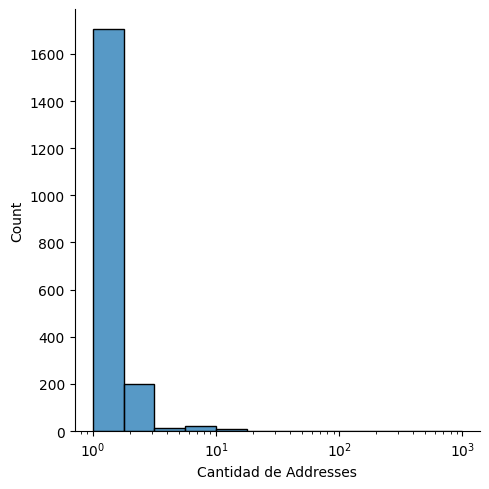

<AxesSubplot: xlabel='Receiver Address', ylabel='Count'>

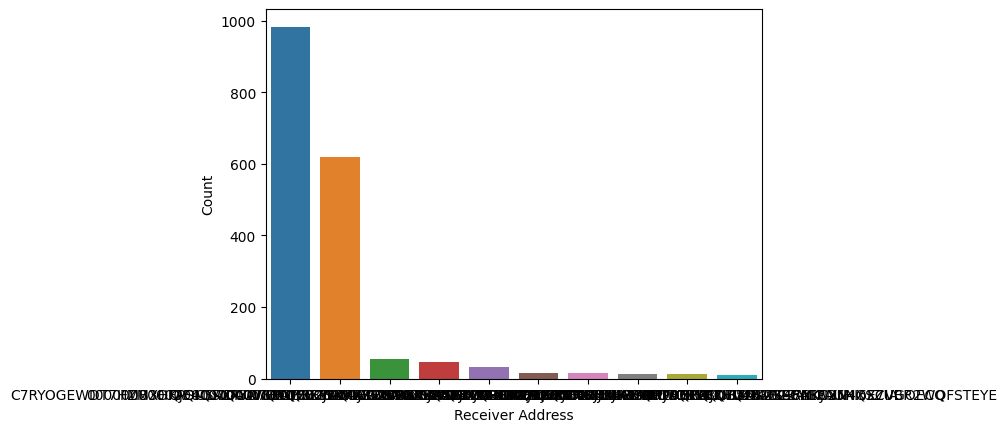

In [4]:
#Grafico de frecuencia para receivers


receivers = df[['Receiver Address', 'Transaction Type']]
receivers

new_df2 = receivers.groupby(['Receiver Address'])['Receiver Address'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
new_df2

sb.displot(new_df2, x = 'Count', log_scale = True)
plt.xlabel('Cantidad de Addresses')
#plt.ylim(0, 600)
plt.show()

f_new_df2 = new_df2[:10]
f_new_df2
sb.barplot(data = f_new_df2, x='Receiver Address', y = 'Count')

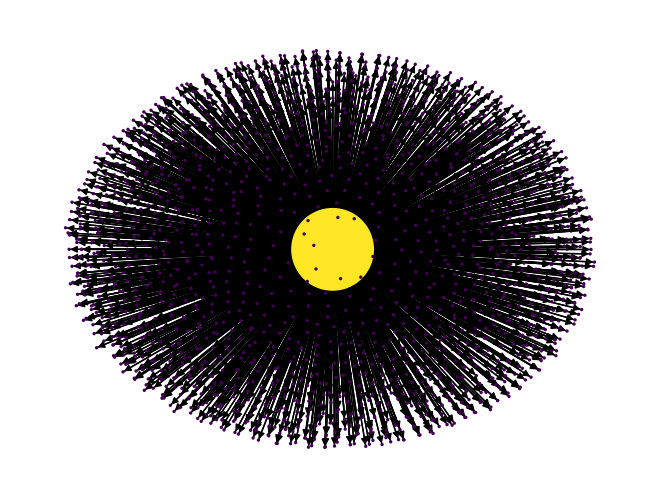

In [14]:
df = df[df['Sender Address'] == 'ZW3ISEHZUHPO7OZGMKLKIIMKVICOUDRCERI454I3DB2BH52HGLSO67W754']

G = nx.from_pandas_edgelist(df,'Sender Address', 'Receiver Address')
DG = nx.DiGraph(incoming_graph_data = G)

node_color = [float(DG.degree(v)) for v in DG]
nx.draw(
    DG,
    node_size = [float(DG.degree(v)) for v in DG],
    node_color=node_color,
    with_labels=False,
)
plt.show()

In [5]:
nx.write_gexf(DG, 'gephi_files/prueba.gexf')

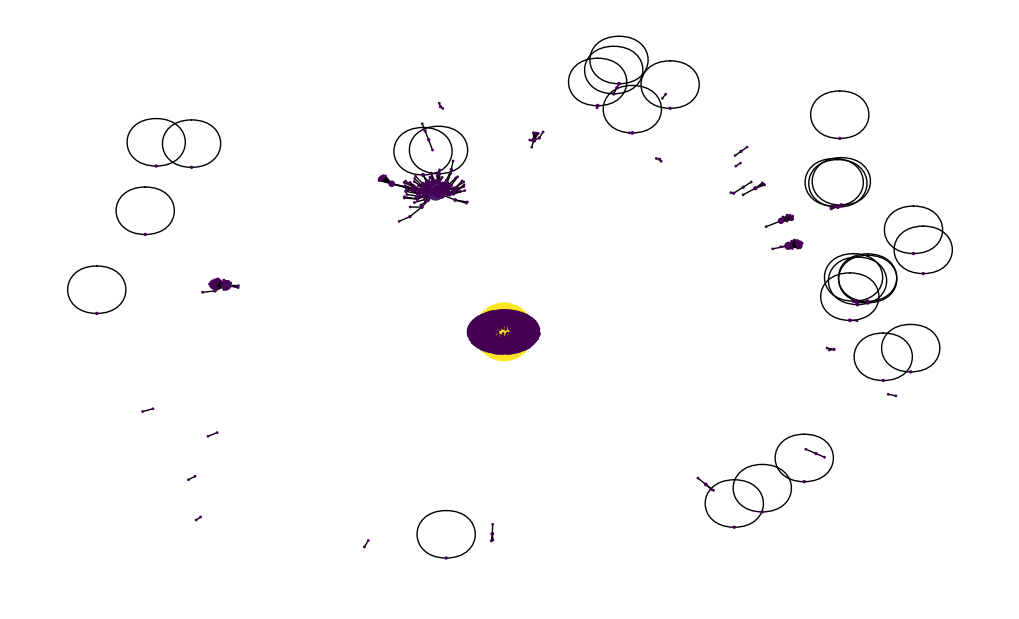

In [5]:
N = nx.DiGraph()
G = nx.from_pandas_edgelist(df,'Sender Address', 'Receiver Address')

plt.figure(figsize=(10, 6))
#nx.draw_networkx(G, with_labels=False)


node_color = [float(G.degree(v)) for v in G]
pos=nx.spring_layout(G)
nx.draw(
    G,
    node_size = [float(G.degree(v)) for v in G],
    node_color=node_color,
    with_labels=False,
)
plt.show()




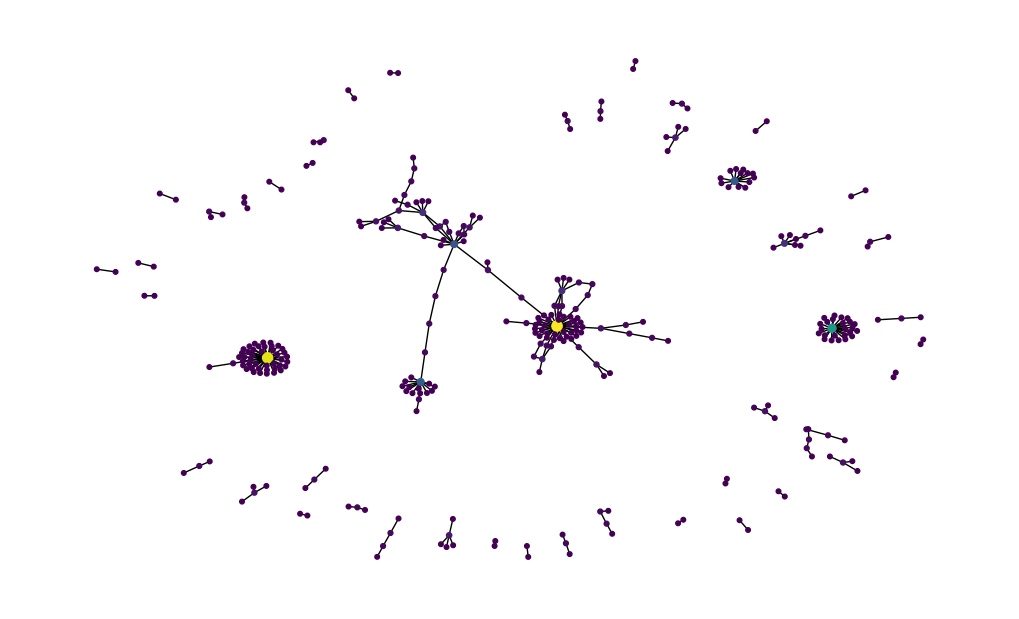

In [6]:
filtered = df[df['Sender Address'] != 'ZW3ISEHZUHPO7OZGMKLKIIMKVICOUDRCERI454I3DB2BH52HGLSO67W754']
filtered2 = filtered[filtered['Receiver Address'] != '0000000000000000000000000000000000000000000000000000000000']
filtered = filtered2
filtered = filtered[filtered['Sender Address'] != filtered['Receiver Address']]
# filtro = filtro[filtro['Sender Address'] != 'ZW3ISEHZUHPO7OZGMKLKIIMKVICOUDRCERI454I3DB2BH52HGLSO67W754']
# filtro = filtro[filtro['Receiver Address'] != '0000000000000000000000000000000000000000000000000000000000']
# filtro = filtro[filtro['Sender Address'] != 'FMBXOFAQCSAD4UWU4Q7IX5AV4FRV6AKURJQYGXLW3CTPTQ7XBX6MALMSPY']
# filtro = filtro[filtro['Receiver Address'] != 'FMBXOFAQCSAD4UWU4Q7IX5AV4FRV6AKURJQYGXLW3CTPTQ7XBX6MALMSPY']
# filtro = filtro[filtro['Sender Address'] != 'OCRYIWGJW23U7XHGB6TLNFGIA4XZDOXEH7ZJRGKHZ725P33S3IFWLCRABA']
# filtro = filtro[filtro['Receiver Address'] != 'QJE4QSU4YO7HKIIY6BWDFD3EWRAZP2AUROARFHFZGMUBFREPUCVQPTOQLM']

H = nx.from_pandas_edgelist(filtered,'Sender Address', 'Receiver Address')

plt.figure(figsize=(10, 6))
node_color = [float(H.degree(v)) for v in H]

nx.draw(
    H,
    node_size = [float(H.degree(v)) +10 for v in H],
    node_color=node_color,
    with_labels=False,
)

In [7]:
nx.write_gexf(H, 'prueba.gexf')